In [1]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm
import pandas as pd
import numpy as np
import gzip
import json
import math
from datetime import datetime
from IPython.display import display
%matplotlib inline

In [2]:
currency_pairs = ['USDT_BTC', 'BTC_ETH', 'BTC_XMR', 'BTC_XRP', 'BTC_FCT', 'BTC_NAV', 'BTC_DASH', 'BTC_MAID', 'BTC_ZEC']
currency_pair = currency_pairs[0]

In [3]:
folder = '../data/'
files = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(folder)) for f in fn]
datafiles = sorted([f for f in files if f.endswith('.log.gz')])
print(datafiles[0])
print(datafiles[-1])
print("Number of datafiles to extract from: {}".format(len(datafiles)))

../data/2016-11-08/poloniex_full_2016-11-08T10:00:09.955811.log.gz
../data/2016-12-09/poloniex_full_2016-12-09T11:29:04.621310.log.gz
Number of datafiles to extract from: 44712


In [4]:
from manage_orderbooks import *

In [5]:
num_samples = None
range_factor = 1.5

filename = "../data/snapshots/experimental/orderbooks_{}_range{}_samples{}_snapshot{}.dict".format(
    currency_pair, range_factor, num_samples, str(datetime.now().isoformat())[:-10])
print(filename)

../data/snapshots/experimental/orderbooks_USDT_BTC_range1.5_samplesNone_snapshot2016-12-09T11:29.dict


In [6]:
query_idx = range(100)
extract_orderbooks_for_one_currencypair([datafiles[idx] for idx in query_idx], currency_pair='USDT_BTC',
                                        outfile=filename,
                                        range_factor=range_factor, num_samples=num_samples, float_precision=2)

  0%|          | 0/100 [00:00<?, ?it/s]

Orderbook content will be written to '../data/snapshots/experimental/orderbooks_USDT_BTC_range1.5_samplesNone_snapshot2016-12-09T11:29.dict'


/usr/lib64/python2.7/site-packages/pandas/core/indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 100/100 [00:22<00:00,  5.28it/s]

Successfully created file '../data/snapshots/experimental/orderbooks_USDT_BTC_range1.5_samplesNone_snapshot2016-12-09T11:29.dict'


In [7]:
orderbooks, timestamps = load_orderbook_snapshot(infile=filename)
# display(timestamps)
print(len(orderbooks[0]))

100%|██████████| 100/100 [00:02<00:00, 40.98it/s]

Loaded Orderbooks: 100
1267


In [8]:
center = orderbooks[0][orderbooks[0].Type=='center'].Price.values[0]
bid = orderbooks[0][orderbooks[0].Type=='bid'].Price.values[-1]
ask = orderbooks[0][orderbooks[0].Type=='ask'].Price.values[0]
print("Bid:    {}".format(bid))
print("Center: {}".format(center))
print("Ask:    {}\n".format(ask))

result = 0
trade_vol = -10
limit=704
trade_info = place_order(orderbooks[0], trade_vol, limit=limit)
display(trade_info['trade_summary'])
display(orderbooks[0][orderbooks[0].Type == 'bid'].tail())
display(orderbooks[0][orderbooks[0].Type == 'ask'].head())

minute = 0
for ob in orderbooks[1:]:
    print("")

    trade_vol -= trade_info['amount_fulfilled']
    print("trade_vol: {:1.4f}, center: {:1.4f}, limit: {}".format(trade_vol, ob[ob.Type=='center'].Price.values[0], limit))
    if trade_vol != 0:
        trade_info = place_order(ob,  trade_vol, limit=limit, trade_history=trade_info['trade_history'])
    minute += 1
    
    if trade_vol == 0:
        break
print("minutes: {}".format(minute))


Bid:    705.0
Center: 705.224976072
Ask:    705.45

Sold -0.1582/-10.0000 shares for 111.5535318


{'705.0': -0.15823196}

,Amount,Price,Type,Volume,VolumeAcc,norm_Price
987,0.913410,702.98,bid,642.109018,2978.529586,0.996817
988,1.700000,703.36,bid,1195.712000,2336.420568,0.997355
989,1.461657,703.50,bid,1028.275411,1140.708568,0.997554
990,0.001250,703.70,bid,0.879625,112.433157,0.997838
991,0.158232,705.00,bid,111.553532,111.553532,0.999681


,Amount,Price,Type,Volume,VolumeAcc,norm_Price
993,3.172181,705.45,ask,2237.815171,2237.815171,1.000319
994,0.052838,706.17,ask,37.312497,2275.127669,1.001340
995,0.645323,706.19,ask,455.720409,2730.848078,1.001368
996,0.105160,706.89,ask,74.336899,2805.184977,1.002361
997,7.988556,707.18,ask,5649.346841,8454.531818,1.002772



trade_vol: -9.8418, center: 704.6247, limit: 704
Sold 0.0000/-9.8418 shares for 0

trade_vol: -9.8418, center: 704.6247, limit: 704
Sold 0.0000/-9.8418 shares for 0

trade_vol: -9.8418, center: 704.6247, limit: 704
Sold 0.0000/-9.8418 shares for 0

trade_vol: -9.8418, center: 704.6247, limit: 704
Sold 0.0000/-9.8418 shares for 0

trade_vol: -9.8418, center: 704.6247, limit: 704
Sold 0.0000/-9.8418 shares for 0

trade_vol: -9.8418, center: 704.6247, limit: 704
Sold 0.0000/-9.8418 shares for 0

trade_vol: -9.8418, center: 704.5549, limit: 704
Sold -6.4076/-9.8418 shares for 4511.5261836

trade_vol: -3.4342, center: 704.5549, limit: 704
Sold -3.4342/-3.4342 shares for 2418.05611104

trade_vol: 0.0000, center: 704.5549, limit: 704
minutes: 9


100
(0, u'2016-11-08T10:00:01.739243')


,Amount,Price,Type,Volume,VolumeAcc,norm_Price
987,0.913410,702.98,bid,642.109018,2978.529586,0.996817
988,1.700000,703.36,bid,1195.712000,2336.420568,0.997355
989,1.461657,703.50,bid,1028.275411,1140.708568,0.997554
990,0.001250,703.70,bid,0.879625,112.433157,0.997838
991,0.158232,705.00,bid,111.553532,111.553532,0.999681


,Amount,Price,Type,Volume,VolumeAcc,norm_Price
993,3.172181,705.45,ask,2237.815171,2237.815171,1.000319
994,0.052838,706.17,ask,37.312497,2275.127669,1.001340
995,0.645323,706.19,ask,455.720409,2730.848078,1.001368
996,0.105160,706.89,ask,74.336899,2805.184977,1.002361
997,7.988556,707.18,ask,5649.346841,8454.531818,1.002772


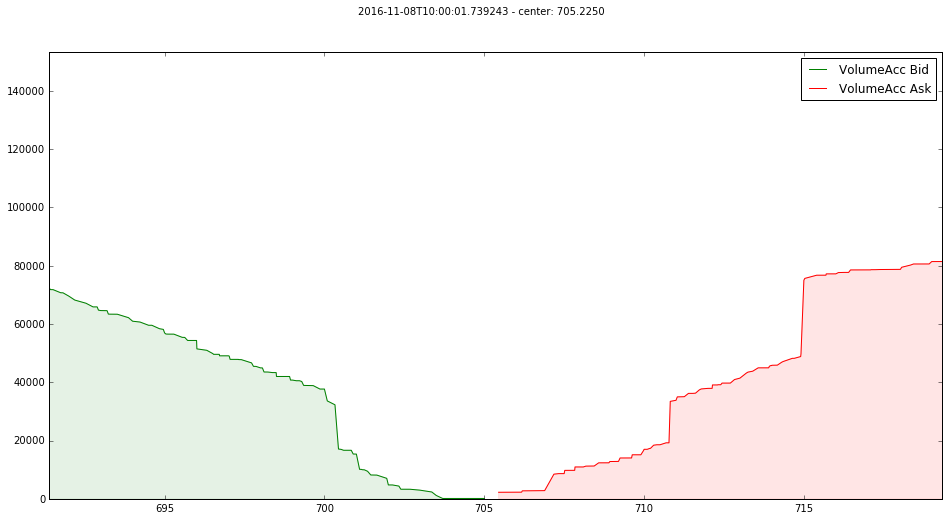

(1, u'2016-11-08T10:01:01.720136')


,Amount,Price,Type,Volume,VolumeAcc,norm_Price
987,0.913410,702.98,bid,642.109018,2978.529586,0.996817
988,1.700000,703.36,bid,1195.712000,2336.420568,0.997355
989,1.461657,703.50,bid,1028.275411,1140.708568,0.997554
990,0.001250,703.70,bid,0.879625,112.433157,0.997838
991,0.158232,705.00,bid,111.553532,111.553532,0.999681


,Amount,Price,Type,Volume,VolumeAcc,norm_Price
993,3.172181,705.45,ask,2237.815171,2237.815171,1.000319
994,0.052838,706.17,ask,37.312497,2275.127669,1.001340
995,0.645323,706.19,ask,455.720409,2730.848078,1.001368
996,0.105160,706.89,ask,74.336899,2805.184977,1.002361
997,7.988556,707.18,ask,5649.346841,8454.531818,1.002772


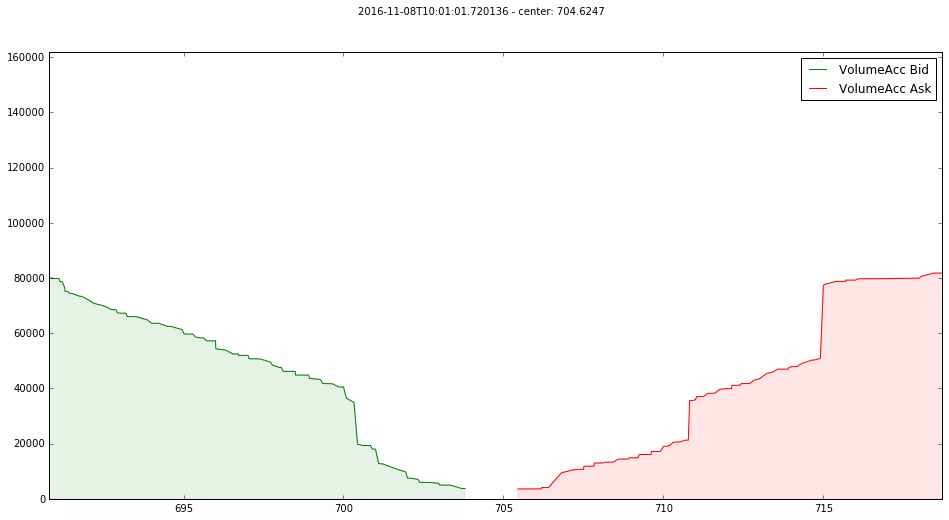

(50, u'2016-11-08T10:50:01.325842')


,Amount,Price,Type,Volume,VolumeAcc,norm_Price
987,0.913410,702.98,bid,642.109018,2978.529586,0.996817
988,1.700000,703.36,bid,1195.712000,2336.420568,0.997355
989,1.461657,703.50,bid,1028.275411,1140.708568,0.997554
990,0.001250,703.70,bid,0.879625,112.433157,0.997838
991,0.158232,705.00,bid,111.553532,111.553532,0.999681


,Amount,Price,Type,Volume,VolumeAcc,norm_Price
993,3.172181,705.45,ask,2237.815171,2237.815171,1.000319
994,0.052838,706.17,ask,37.312497,2275.127669,1.001340
995,0.645323,706.19,ask,455.720409,2730.848078,1.001368
996,0.105160,706.89,ask,74.336899,2805.184977,1.002361
997,7.988556,707.18,ask,5649.346841,8454.531818,1.002772


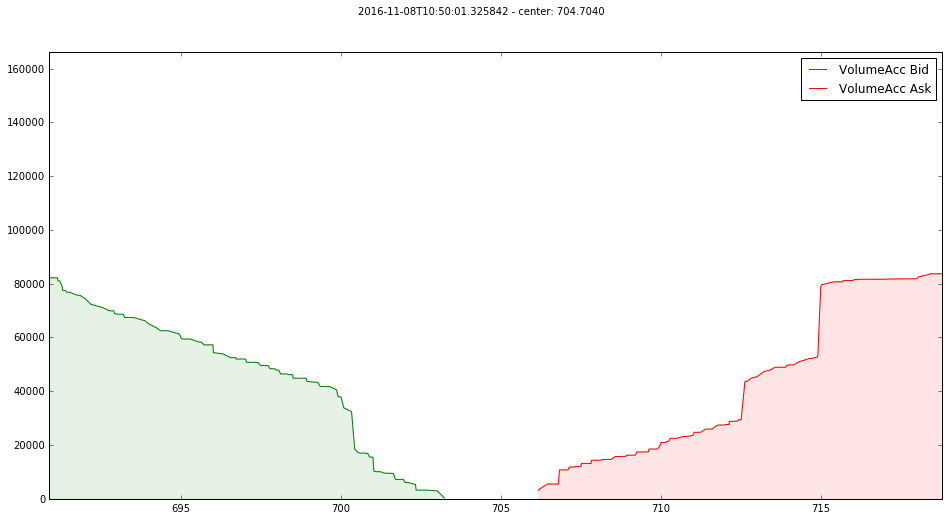

(99, u'2016-11-08T11:40:01.440536')


,Amount,Price,Type,Volume,VolumeAcc,norm_Price
987,0.913410,702.98,bid,642.109018,2978.529586,0.996817
988,1.700000,703.36,bid,1195.712000,2336.420568,0.997355
989,1.461657,703.50,bid,1028.275411,1140.708568,0.997554
990,0.001250,703.70,bid,0.879625,112.433157,0.997838
991,0.158232,705.00,bid,111.553532,111.553532,0.999681


,Amount,Price,Type,Volume,VolumeAcc,norm_Price
993,3.172181,705.45,ask,2237.815171,2237.815171,1.000319
994,0.052838,706.17,ask,37.312497,2275.127669,1.001340
995,0.645323,706.19,ask,455.720409,2730.848078,1.001368
996,0.105160,706.89,ask,74.336899,2805.184977,1.002361
997,7.988556,707.18,ask,5649.346841,8454.531818,1.002772


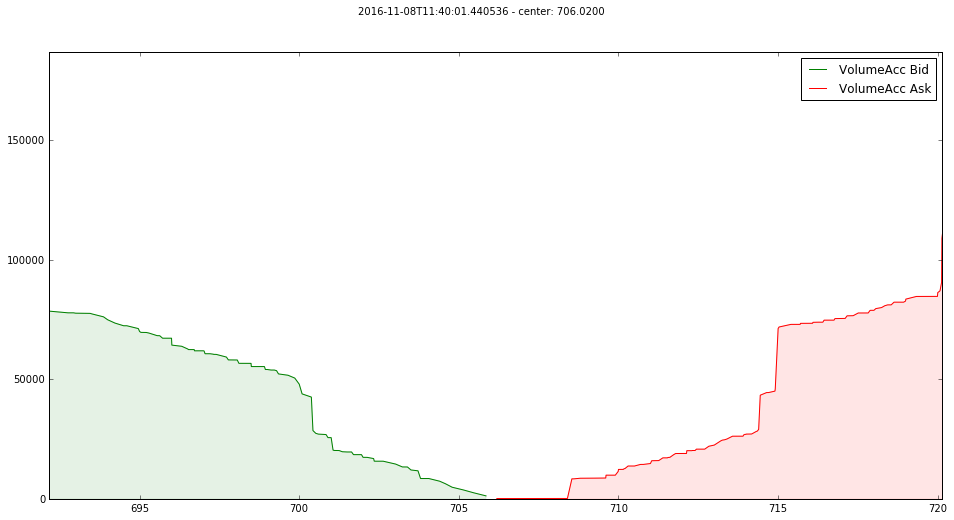

In [9]:

range_factor = 1.02
# plot_orderbook(data[0], normalized=True, range_factor=range_factor)
print(len(orderbooks))
for idx in [0, 1, 50, 99]:
    print(idx, timestamps[idx])
    display(orderbooks[0][orderbooks[0].Type == 'bid'].tail(5))
    display(orderbooks[0][orderbooks[0].Type == 'ask'].head(5))
    plot_orderbook(orderbooks[idx], title=timestamps[idx], normalized=False, range_factor=range_factor)